In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# from model import encoder, decoder
from tqdm import tqdm

In [4]:
class Debug:
    pass

debug = Debug()

In [5]:
def res_block(inputs, filters, kernel_size, strides=(1, 1), kernel_initializer=None):
    x = inputs

    x = tf.layers.conv2d(x, 4, kernel_size=3, strides=(1, 1), padding="same", kernel_initializer=initializer)
    x = tf.layers.batch_normalization(x, axis=3, epsilon=1e-5, momentum=0.1, training=True, gamma_initializer=kernel_initializer)

    
#     # 
#     x = tf.layers.conv2d(x, filters, kernel_size=kernel_size, strides=strides, padding="same", kernel_initializer=kernel_initializer)
#     x = tf.layers.batch_normalization(inputs, axis=3, epsilon=1e-5, momentum=0.1, training=True, gamma_initializer=kernel_initializer)
#     x = tf.nn.relu(x)

#     x = tf.layers.conv2d(x, filters, kernel_size=kernel_size, strides=strides, padding="same", kernel_initializer=kernel_initializer)
#     x = tf.layers.batch_normalization(inputs, axis=3, epsilon=1e-5, momentum=0.1, training=True, gamma_initializer=kernel_initializer)
#     x = tf.nn.relu(x + inputs)

    return x


In [6]:
inputs = tf.placeholder(tf.float32, (None, 4, 4, 4))

In [7]:
# initializer = tf.random_normal_initializer(0, 0.02)

# x = inputs
# x = tf.layers.conv2d(x, 4, kernel_size=3, strides=(1, 1), padding="same", kernel_initializer=initializer)

# x = tf.image.resize_images(x, size=(x.shape[1]*2, x.shape[2]*2), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# x = tf.layers.conv2d(x, 4, kernel_size=3, strides=(1, 1), padding="same", kernel_initializer=initializer)

# x = tf.image.resize_images(x, size=(x.shape[1]*2, x.shape[2]*2), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# x = tf.layers.conv2d(x, 4, kernel_size=3, strides=(1, 1), padding="same", kernel_initializer=initializer)

# x = tf.image.resize_images(x, size=(x.shape[1]*2, x.shape[2]*2), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# x = tf.layers.conv2d(x, 4, kernel_size=3, strides=(1, 1), padding="same", kernel_initializer=initializer)


# x = tf.tanh(x)

In [8]:
initializer = tf.random_normal_initializer(0, 0.02)

x = inputs
x = res_block(x, 4, kernel_size=3, strides=(1, 1), kernel_initializer=initializer)

x = tf.image.resize_images(x, size=(x.shape[1]*2, x.shape[2]*2), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
x = res_block(x, 4, kernel_size=3, strides=(1, 1), kernel_initializer=initializer)

x = tf.image.resize_images(x, size=(x.shape[1]*2, x.shape[2]*2), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
x = res_block(x, 4, kernel_size=3, strides=(1, 1), kernel_initializer=initializer)

x = tf.image.resize_images(x, size=(x.shape[1]*2, x.shape[2]*2), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
x = res_block(x, 4, kernel_size=3, strides=(1, 1), kernel_initializer=initializer)


x = tf.tanh(x)

In [9]:
y = x

In [10]:
# data load

import numpy as np
data = np.random.randn(100, 4, 4, 4)


In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()

In [12]:
sess.run(init)

In [13]:
image = data[0]

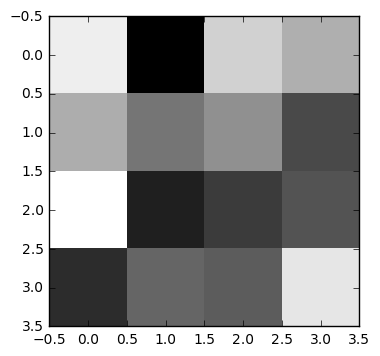

In [14]:
plt.imshow(image[:, :, 0], cmap='gray', interpolation='nearest')

In [15]:
decoded = sess.run(y,  {inputs: data})

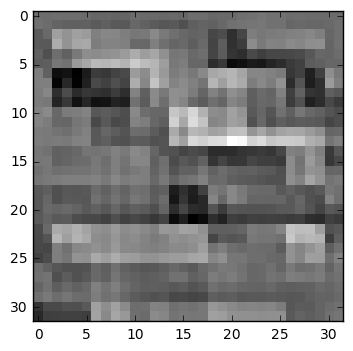

In [16]:
plt.imshow(decoded[0, :, :].mean(-1), cmap='gray', interpolation='nearest')